# 2.a Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import pygal

In [2]:
data = pd.read_csv('train_MNIST_logistic_regression.csv')

$X=\begin{pmatrix} x_1 \\ \vdots \\ x_n \end{pmatrix}$

In [3]:
# append 'Intercept' column
Xpred = list(data.columns)
Xpred.remove('label')
Xcols = ['Intercept'] + Xpred

n = data.shape[0]
p = len(Xpred)
data = data.assign(Intercept=np.ones(n))

In [4]:
X = data[Xcols].as_matrix()
y = list(data.label == 2)

### Coefficient
$\beta'=\beta-\eta\nabla J(\beta)$

In [5]:
eta = 0.005
beta = np.zeros((1 + p,))

for epoch in range(100):
    J_beta = 0
    for i in range(n):
        yi = 2 * y[i] - 1
        J_beta = J_beta + np.dot(yi, X[i]) / (1 + np.exp(np.dot(np.dot(yi, beta.T), X[i])))
    beta = beta + eta * J_beta

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


### Logit
$p(X)=\frac{1}{1+e^{-X\beta}}$

In [6]:
train_result = 1 / (1 + np.exp(-np.dot(X, beta)))

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


### Test

In [7]:
test_data = pd.read_csv('test_MNIST_logistic_regression.csv', names=Xpred)
label_data = pd.read_csv('label_MNIST_logistic_regression.csv', header=None)

In [8]:
test_data = test_data.assign(Intercept=np.ones(test_data.shape[0]))
test_label = list(label_data[0] == 2)

In [9]:
test_result = 1 / (1 + np.exp(-np.dot(test_data, beta)))
pred = [x > 0.5 for x in test_result]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


### Confusion Matrix

In [10]:
confusion_list = list(zip(test_label, pred))
cmatrix = [[confusion_list.count((k1, k2)) for k2 in [False, True]] for k1 in [False, True]]

In [11]:
pd.DataFrame([
    *[[*cmatrix[i], sum(cmatrix[i])] for i in range(2)],
    list(np.sum(cmatrix, axis=0)) + [np.sum(cmatrix)]],
    columns=[['Confusion Matrix'] * 3, ['True class'] * 3, [0, 2, 'Total']],
    index=[['Predicted class'] * 3, [0, 2, 'Total']]
)

Confusion Matrix           
                            True class           
                                     0    2 Total
Predicted class 0                  632   46   678
                2                   14  618   632
                Total              646  664  1310

### ROC curve

In [12]:
pt = [(0, 0)]
for p in np.arange(0.1, 1.0, 0.1):
    pred = [x > p for x in test_result]
    clist = list(zip(test_label, pred))
    TPR = clist.count((False, False)) / test_label.count(False)
    FPR = clist.count((True, False)) / test_label.count(True)
    pt.append((FPR, TPR))
pt.append((1, 1))

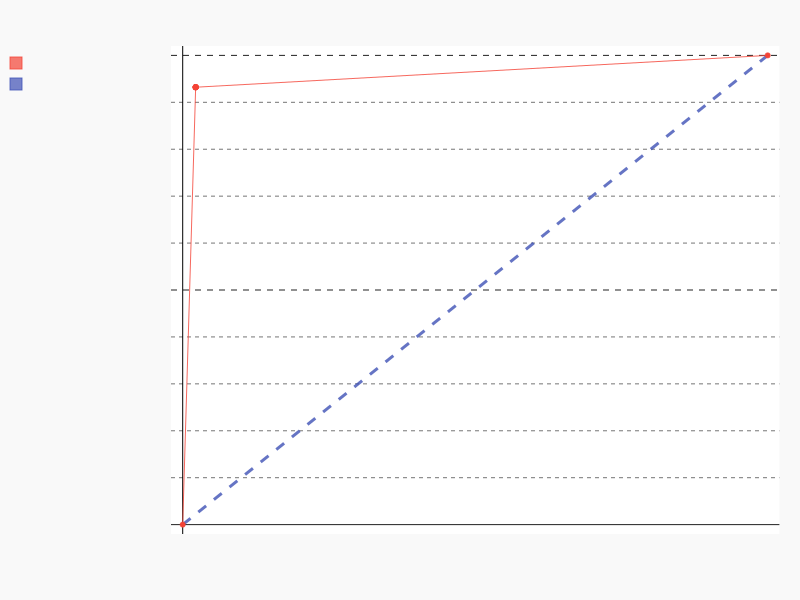

In [13]:
roc = pygal.XY(title = 'ROC curve', x_title='False Positive Rate', y_title='True Positive Rate')
roc.add('ROC curve', pt)
roc.add('by chance', [(0, 0), (1, 1)], show_dots=False, stroke_style={'width': 3, 'dasharray': 10})
roc